# **Importing Libraries**

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_selection import VarianceThreshold, mutual_info_classif  # for Feature Selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score  # for evaluation
from sklearn.linear_model import LogisticRegression

In [289]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Handling Missing Values**

In [290]:

# Load Data /content/drive/MyDrive/KU-17_B01_Kandy_Uni/data
df = pd.read_csv('/content/drive/MyDrive/KU-17_B01_Kandy_Uni/data/survey.csv')

df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [291]:
print("Missing values per column before filling:")
print(df.isnull().sum())

Missing values per column before filling:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


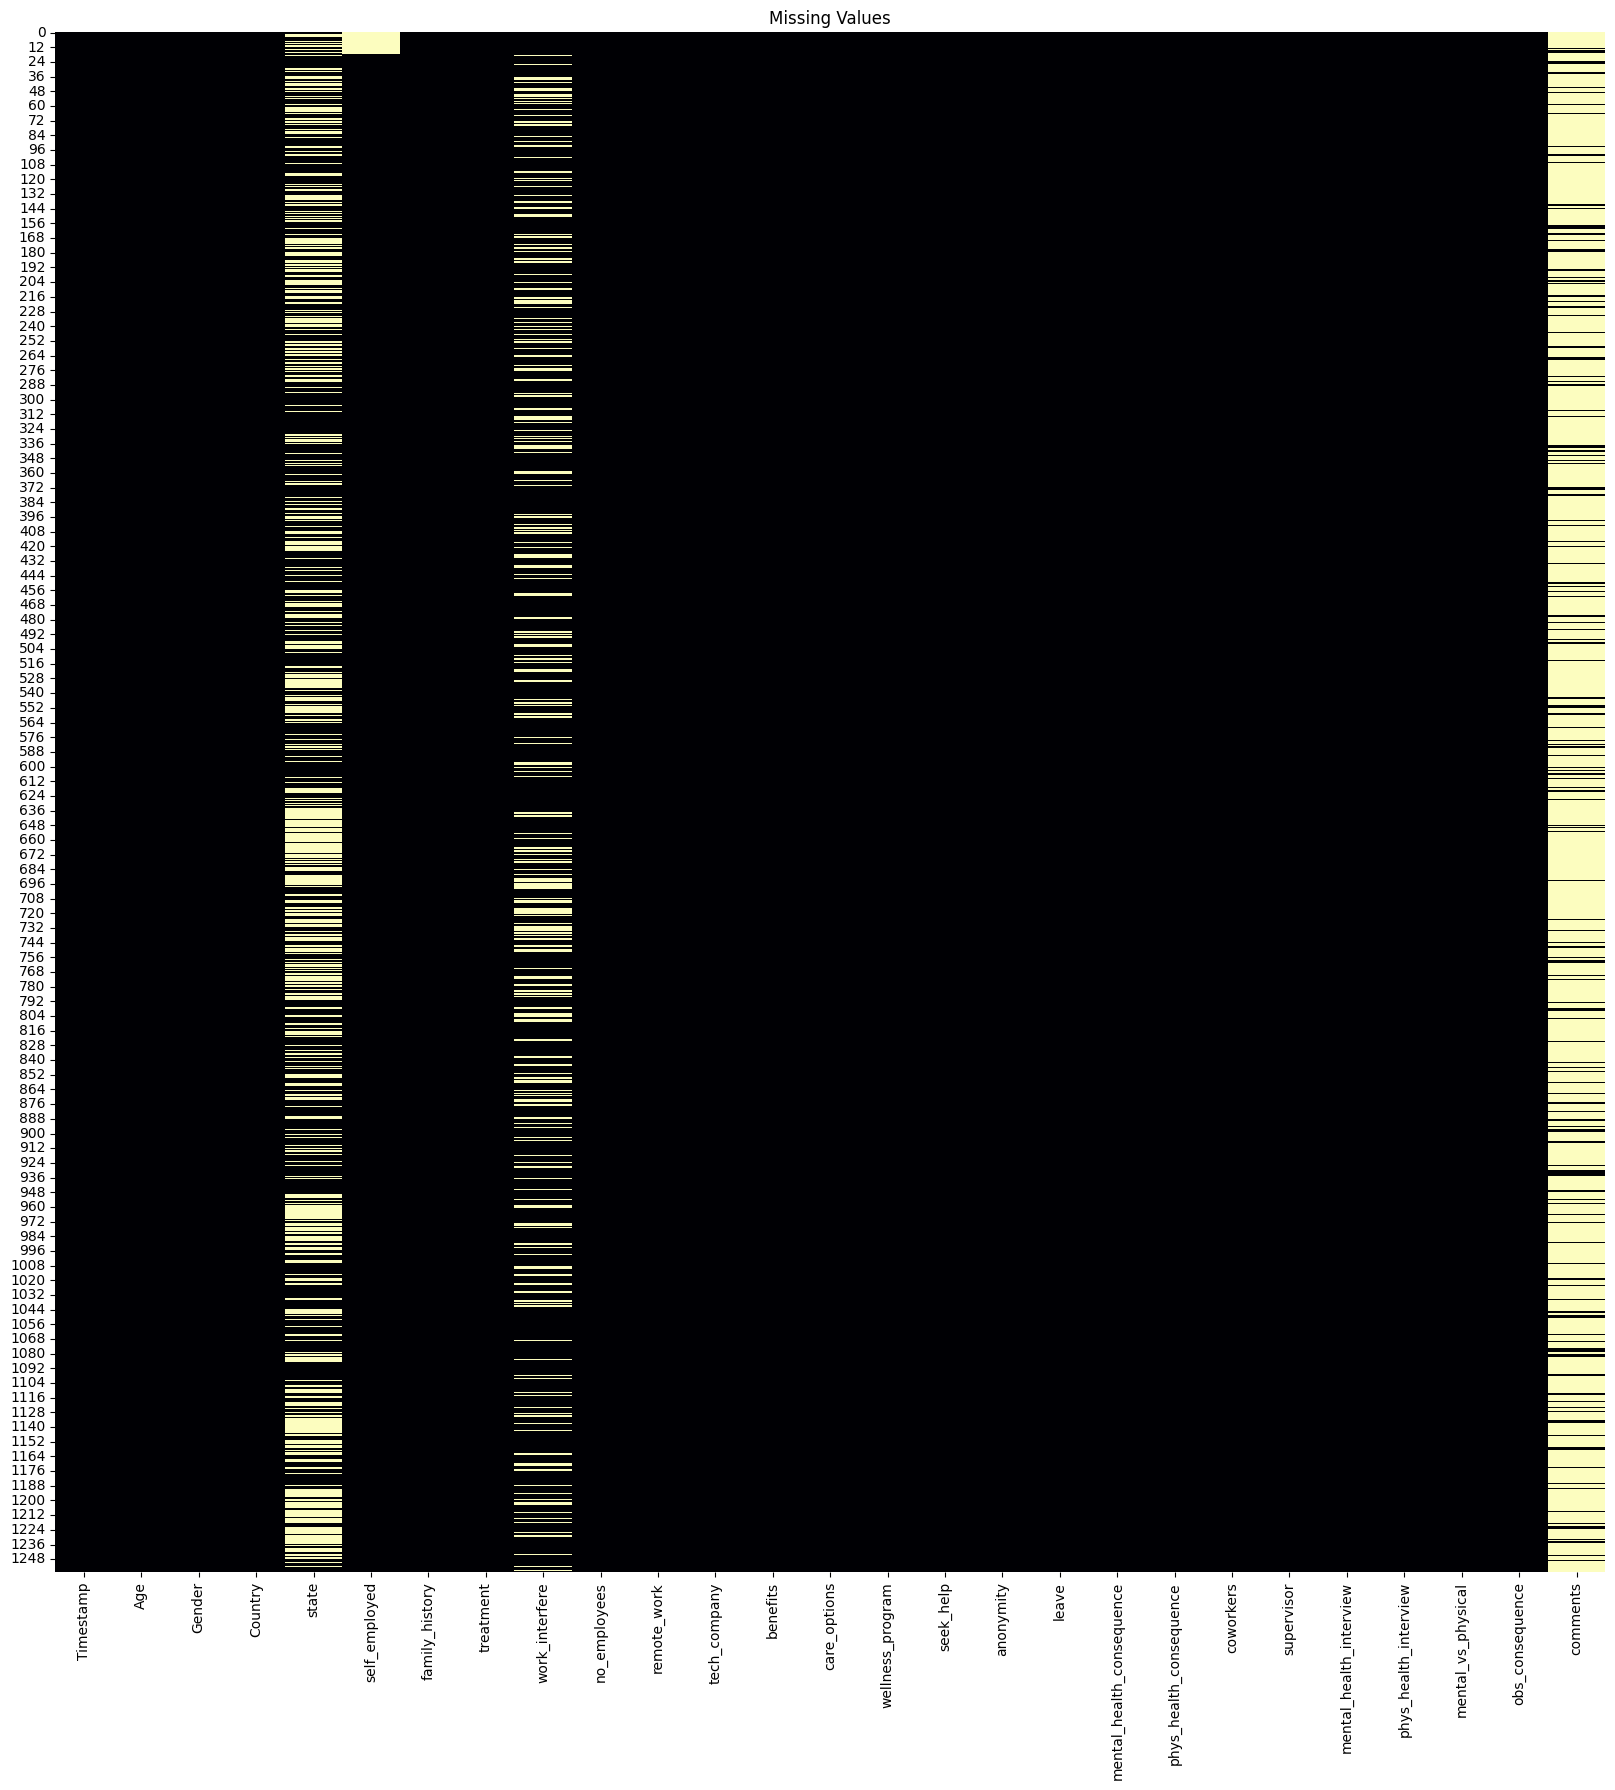

In [292]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), cbar=False,cmap='magma')
plt.title('Missing Values')
plt.show()

In [293]:
# Coerce Age to numeric (invalid strings -> NaN), then impute with median
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)
print(f'Filled Age missing values with median: {age_median}')
df = df.drop('comments', axis=1)
df = df.drop('state', axis=1)
for columns in df.select_dtypes(include = 'object').columns:
  df[columns] = df[columns].fillna('Unknown')
print("Missing values after filling:")
print(df.isnull().sum())

Filled Age missing values with median: 31.0
Missing values after filling:
Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


# **Standardizing the Gender Feature**

In [294]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [295]:
df['Gender'].nunique()

49

In [296]:
# make copy
df['Gender_Clean'] = df['Gender']

# convert to lowecase
df['Gender_Clean'] = df['Gender'].astype(str).str.lower().str.strip().fillna('')

In [297]:
df['Gender_Clean'].nunique()

41

In [298]:
male_variations = ['male', 'm', 'man', 'cis male', 'cis man', 'male ',
    'cis-male', 'male (cis)', 'malr', 'maile', 'msle', 'make',
    'male (trans)', 'male leaning androgynous', 'guy', 'male-ish',
    'cis male ', 'cis-male ', 'cis man ', 'cis man', 'cis male', 'cis man', 'gent', 'him']
female_variations = ['female', 'f', 'woman', 'cis female', 'cis woman', 'female ',
    'cis-female', 'female (cis)', 'cis-female ', 'cis female ',
    'female ', 'woman ', 'cis woman', 'she', 'her'
]

In [299]:
for i in range(len(df['Gender_Clean'])):
  if df.loc[i, 'Gender_Clean'] in female_variations:
    df.loc[i, 'Gender_Clean'] = 'female'
  elif df.loc[i, 'Gender_Clean'] in male_variations:
    df.loc[i, 'Gender_Clean'] = 'male'
  else:
    df.loc[i, 'Gender_Clean'] = 'other'

In [300]:
df['Gender_Clean'].unique()

array(['female', 'male', 'other'], dtype=object)

In [301]:
df['Gender_Clean'].value_counts()

,count
Gender_Clean,
male,990
female,244
other,25


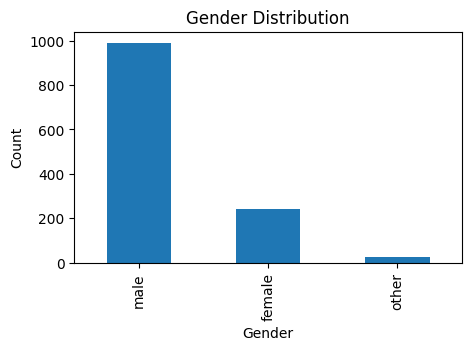

In [302]:
plt.figure(figsize=(5,3))
df['Gender_Clean'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [303]:
df = df.drop('Gender', axis=1)

# **Handling Outliers**

In [304]:
# Remove rows with invalid Age values (not in [0, 100] or missing)
if 'Age' in df.columns:
    valid = df['Age'].between(0, 100) & df['Age'].notnull()
    df = df.loc[valid].reset_index(drop=True)
    print(f"Rows remaining after removing invalid Age: {len(df)}")
else:
    print("'Age' column not found.")

Rows remaining after removing invalid Age: 1254


In [305]:
numeric_cols = ['Age', 'no_employees']

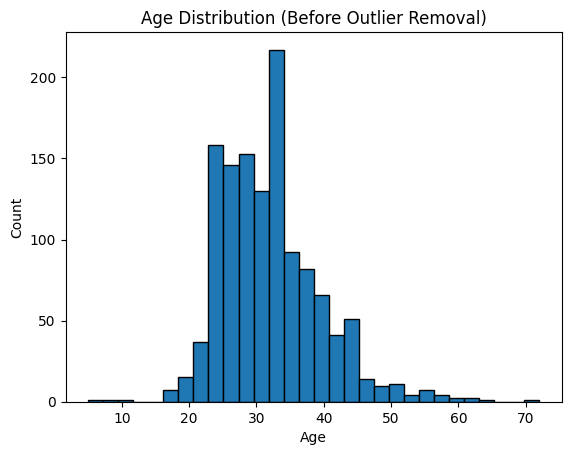

In [306]:
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution (Before Outlier Removal)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='treatment'>

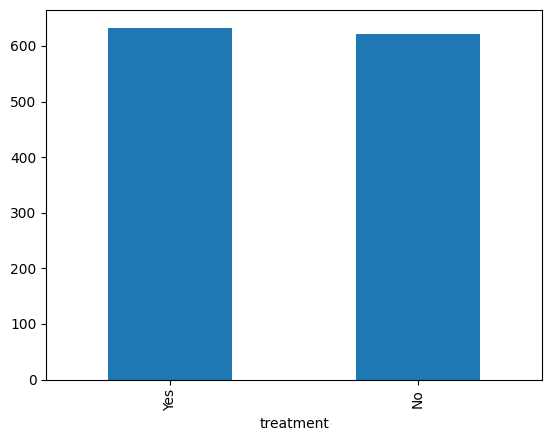

In [307]:
df['treatment'].value_counts().plot(kind='bar')

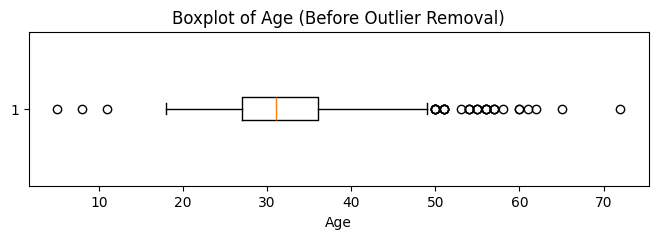

In [308]:
plt.figure(figsize=(8, 2))
plt.boxplot(df['Age'], vert=False)
plt.title('Boxplot of Age (Before Outlier Removal)')
plt.xlabel('Age')
plt.show()

In [309]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound = max(lower_bound, 10)   # Age should be at least 10
upper_bound = min(upper_bound, 100)  # Age should be at most 100

In [310]:
df_no_outlier = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

In [311]:
print("Number of rows before removing outliers:", len(df))
print("Number of rows after removing outliers:", len(df_no_outlier))
print("Outliers removed:", len(df) - len(df_no_outlier))

Number of rows before removing outliers: 1254
Number of rows after removing outliers: 1219
Outliers removed: 35


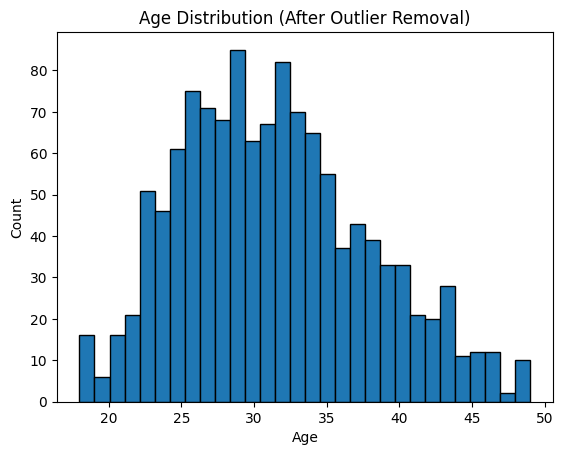

In [312]:
plt.hist(df_no_outlier['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution (After Outlier Removal)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

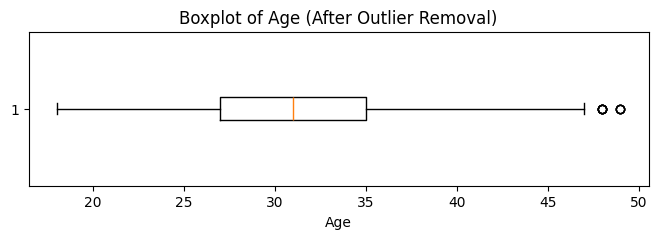

In [313]:
plt.figure(figsize=(8, 2))
plt.boxplot(df_no_outlier['Age'], vert=False)
plt.title('Boxplot of Age (After Outlier Removal)')
plt.xlabel('Age')
plt.show()

<Axes: xlabel='treatment'>

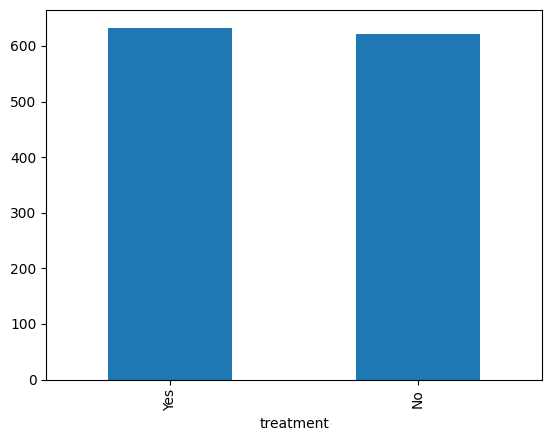

In [314]:
df['treatment'].value_counts().plot(kind='bar')

# **Standardization / Normalization**

In [315]:
scaler = StandardScaler()

df['Age_standardized'] = scaler.fit_transform(df[['Age']])


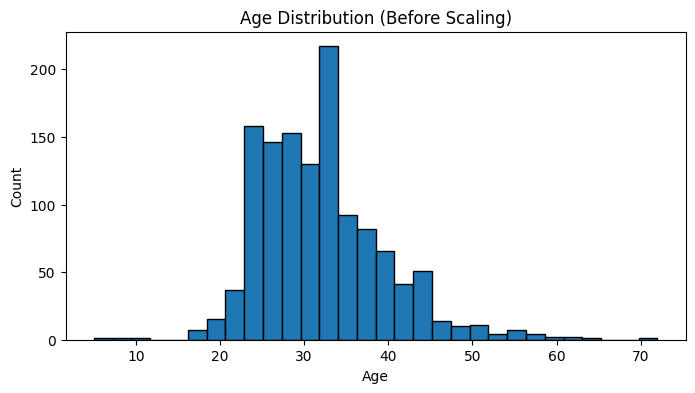

In [316]:
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=30, edgecolor='black')
plt.title('Age Distribution (Before Scaling)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


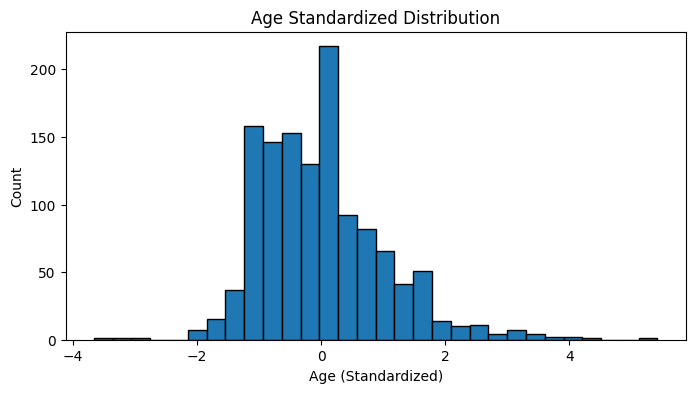

In [317]:
plt.figure(figsize=(8, 4))
plt.hist(df['Age_standardized'], bins=30, edgecolor='black')
plt.title('Age Standardized Distribution')
plt.xlabel('Age (Standardized)')
plt.ylabel('Count')
plt.show()


# **Encoding Categorical Variables**

In [318]:
# Group rare countries on the copied dataframe used later (df)
country_counts = df['Country'].fillna('Unknown').value_counts()
rare_threshold = 10
rare_countries = country_counts[country_counts < rare_threshold].index.tolist()
df['Country'] = df['Country'].fillna('Unknown').replace(rare_countries, 'Other')
print("Country value counts after grouping rare countries (df):")
print(df['Country'].value_counts().head(20))

Country value counts after grouping rare countries (df):
Country
United States     748
United Kingdom    184
Other             107
Canada             72
Germany            45
Netherlands        27
Ireland            27
Australia          21
France             13
India              10
Name: count, dtype: int64


In [319]:
for cols in df.columns:
  print(f"{cols}: {df[cols].unique()}")

Timestamp: ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
Age: [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72]
Country: ['United States' 'Canada' 'United Kingdom' 'Other' 'France' 'Netherlands'
 'Australia' 'Germany' 'Ireland' 'India']
self_employed: ['Unknown' 'Yes' 'No']
family_history: ['No' 'Yes']
treatment: ['Yes' 'No']
work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' 'Unknown']
no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']
remote_work: ['No' 'Yes']
tech_company: ['Yes' 'No']
benefits: ['Yes' "Don't know" 'No']
care_options: ['Not sure' 'No' 'Yes']
wellness_program: ['No' "Don't know" 'Yes']
seek_help: ['Yes' "Don't know" 'No']
anonymity: ['Yes' "Don't know" 'No']
leave: ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
mental_

In [320]:
binary_cols = [
    "family_history", "treatment", "remote_work", "tech_company", "obs_consequence"
]
# lowercase keys to match .str.lower() below
binary_map = {'yes': 1, 'no': 0}
mappings = {}

for c in binary_cols:
    if c in df.columns:
        # make string, lowercase, strip; then map; unknowns get -1
        df[c] = df[c].fillna('Unknown').astype(str).str.strip().str.lower().map(binary_map).fillna(-1).astype(int)
        mappings[c] = {'Yes': 1, 'No': 0, 'Unknown': -1}
    else:
        print(f"Note: binary column '{c}' not found, skipping.")




In [321]:
# ---- Ordinal mappings (explicit dicts) ----
# Provide the expected orders (edit if you have different labels)
work_map = {'Never': 0, 'Rarely': 1, 'Sometimes': 2, 'Often': 3, 'Unknown': -1}
no_emp_map = {
    '1-5': 0, '6-25': 1, '26-100': 2, '100-500': 3, '500-1000': 4,
    'More than 1000': 5, 'Unknown': -1
}
leave_map = {
    'Very difficult': 0, 'Somewhat difficult': 1, 'Somewhat easy': 2, 'Very easy': 3, 'Don\'t know': -1, 'Unknown': -1
}

In [322]:
# Apply work_interfere
if 'work_interfere' in df.columns:
    df['work_interfere'] = df['work_interfere'].fillna('Unknown').astype(str).map(
        lambda v: work_map.get(v, work_map.get(v.title(), -1))
    ).astype(int)
    mappings['work_interfere'] = work_map
else:
    print("Note: 'work_interfere' not found, skipping.")

# Apply no_employees
if 'no_employees' in df.columns:
    df['no_employees'] = df['no_employees'].fillna('Unknown').astype(str).map(
        lambda v: no_emp_map.get(v, no_emp_map.get(v.title(), -1))
    ).astype(int)
    mappings['no_employees'] = no_emp_map
else:
    print("Note: 'no_employees' not found, skipping.")

# Apply leave
if 'leave' in df.columns:
    df['leave'] = df['leave'].fillna('Unknown').astype(str).map(
        lambda v: leave_map.get(v, leave_map.get(v.title(), -1))
    ).astype(int)
    mappings['leave'] = leave_map
else:
    print("Note: 'leave' not found, skipping.")


In [323]:
three_map = {'no': 0, 'maybe': 1, 'yes': 2, 'unknown': -1}
three_level_cols = [
    "mental_health_consequence", "phys_health_consequence",
    "mental_health_interview", "phys_health_interview"
]
for c in three_level_cols:
    if c in df.columns:
        df[c] = df[c].fillna('Unknown').astype(str).str.strip().str.lower().map(three_map).fillna(-1).astype(int)
        mappings[c] = {'No': 0, 'Maybe': 1, 'Yes': 2, 'Unknown': -1}
    else:
        print(f"Note: three-level column '{c}' not found, skipping.")

In [324]:
sot_map = {'no': 0, 'some of them': 1, 'yes': 2, 'unknown': -1}
for c in ['coworkers', 'supervisor']:
    if c in df.columns:
        df[c] = df[c].fillna('Unknown').astype(str).str.strip().str.lower().map(sot_map).fillna(-1).astype(int)
        mappings[c] = {'No': 0, 'Some of them': 1, 'Yes': 2, 'Unknown': -1}
    else:
        print(f"Note: '{c}' not found, skipping.")

In [325]:
one_hot_cols = [
    "Country", "self_employed", "benefits", "care_options",
    "wellness_program", "seek_help", "anonymity", "mental_vs_physical",
    "Gender_Clean"
]
one_hot_present = [c for c in one_hot_cols if c in df.columns]
if one_hot_present:
    for c in one_hot_present:
        df[c] = df[c].fillna('Unknown').astype(str)
    df = pd.get_dummies(df, columns=one_hot_present, drop_first=False)
    print("One-hot encoded:", one_hot_present)
else:
    print("No one-hot nominal columns found, skipping get_dummies.")

One-hot encoded: ['Country', 'self_employed', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'mental_vs_physical', 'Gender_Clean']


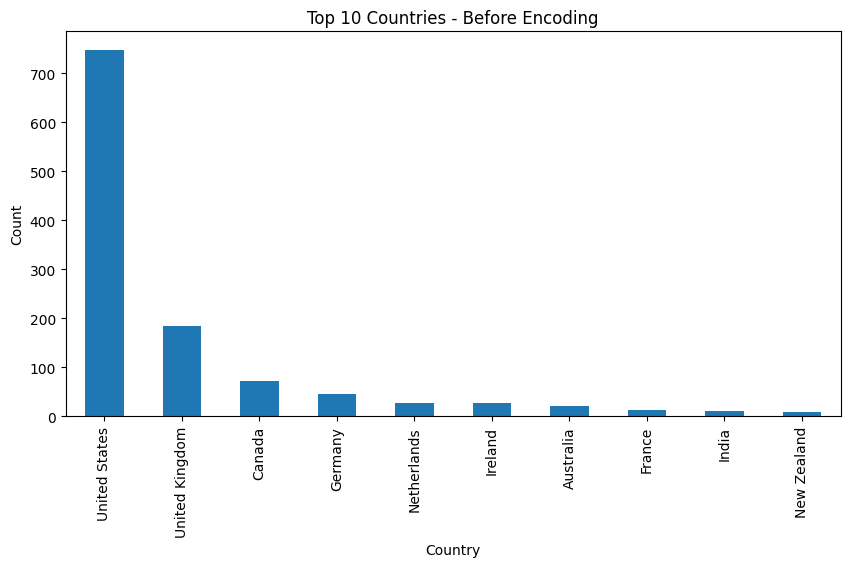

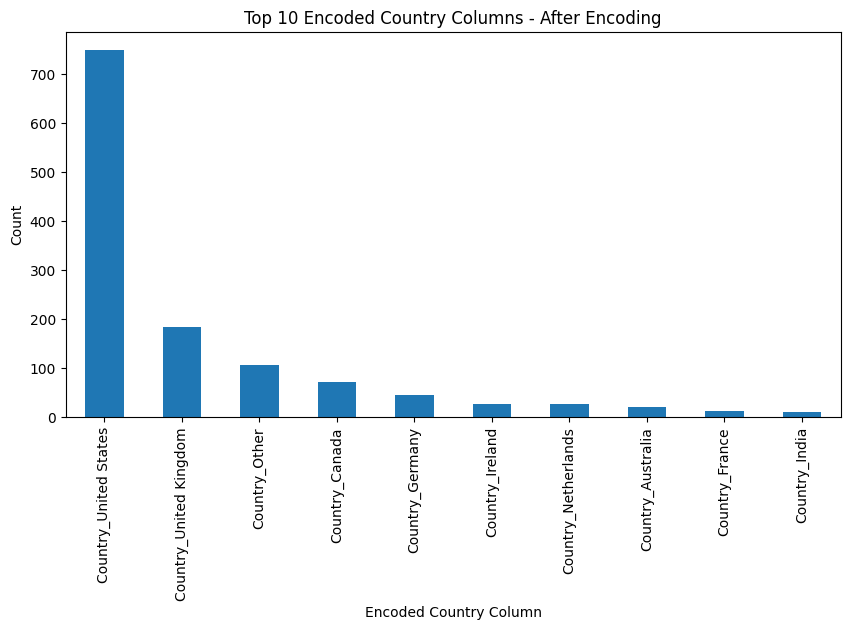

In [326]:
import matplotlib.pyplot as plt

#  visualize "Country" before encoding
plt.figure(figsize=(10,5))
df_original = pd.read_csv('/content/drive/MyDrive/KU-17_B01_Kandy_Uni/results/outputs/survey_scaled.csv')

df_original['Country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries - Before Encoding")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

# After encoding
country_cols = [c for c in df.columns if c.startswith("Country_")]

df[country_cols].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Encoded Country Columns - After Encoding")
plt.xlabel("Encoded Country Column")
plt.ylabel("Count")
plt.show()


# **Feature Engineering**

# **2. Data Loading and Data Analysis**

### Display basic info

In [327]:
print("Dataset shape:", df.shape)
print(f"We have {df.shape[0]} Survey responses and {df.shape[1]} Features")


print('First 3 rows of the dataset:')
display(df.head(3))

print('Last 3 rows of the dataset:')
display(df.tail(3))

Dataset shape: (1254, 51)
We have 1254 Survey responses and 51 Features
First 3 rows of the dataset:


,Timestamp,Age,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,mental_health_consequence,...,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,Gender_Clean_female,Gender_Clean_male,Gender_Clean_other
0,2014-08-27 11:29:31,37,0,1,3,1,0,1,2,0,...,True,False,False,True,False,False,True,True,False,False
1,2014-08-27 11:29:37,44,0,0,1,5,0,0,-1,1,...,False,True,False,False,True,False,False,False,True,False
2,2014-08-27 11:29:44,32,0,0,1,1,0,1,1,0,...,False,True,False,False,False,True,False,False,True,False


Last 3 rows of the dataset:


,Timestamp,Age,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,leave,mental_health_consequence,...,seek_help_Yes,anonymity_Don't know,anonymity_No,anonymity_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,Gender_Clean_female,Gender_Clean_male,Gender_Clean_other
1251,2015-11-07 12:36:58,34,1,1,2,5,0,1,1,2,...,False,True,False,False,False,True,False,False,True,False
1252,2015-11-30 21:25:06,46,0,0,-1,3,1,1,-1,2,...,False,True,False,False,False,True,False,True,False,False
1253,2016-02-01 23:04:31,25,1,1,2,2,0,0,-1,1,...,False,False,False,True,True,False,False,False,True,False


### Table to understand our data better

In [328]:
# summary table
data_info = pd.DataFrame({
    'Column': df.columns,
    'Data_Type': df.dtypes,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': round((df.isnull().sum() / len(df)) * 100, 2),
    'Unique_Values': df.nunique()
})
data_info.set_index(np.arange(len(df.columns)), inplace=True)

display(data_info)

,Column,Data_Type,Missing_Count,Missing_Percentage,Unique_Values
0,Timestamp,object,0,0.0,1242
1,Age,int64,0,0.0,48
2,family_history,int64,0,0.0,2
3,treatment,int64,0,0.0,2
4,work_interfere,int64,0,0.0,5
5,no_employees,int64,0,0.0,6
6,remote_work,int64,0,0.0,2
7,tech_company,int64,0,0.0,2
8,leave,int64,0,0.0,5
9,mental_health_consequence,int64,0,0.0,3


### Target Variable Distribution Analysis

In [329]:
print(df['treatment'].value_counts(normalize=True)) # target variable distribution
print("1 = Sought treatment, 0 = Did not seek treatment")

treatment
1    0.504785
0    0.495215
Name: proportion, dtype: float64
1 = Sought treatment, 0 = Did not seek treatment


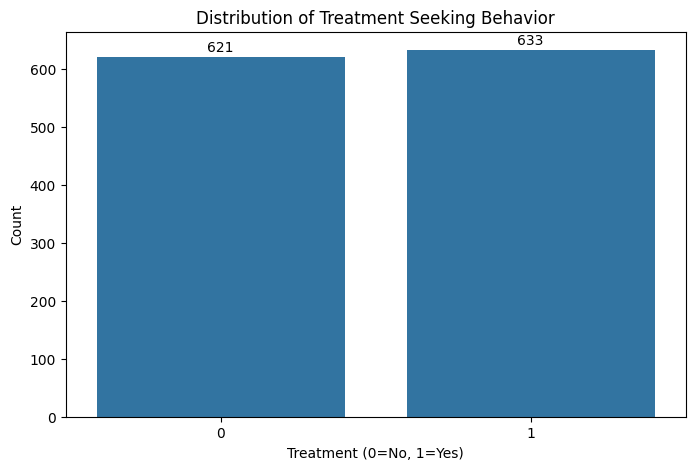

In [330]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='treatment', data=df)
plt.title('Distribution of Treatment Seeking Behavior')
plt.xlabel('Treatment (0=No, 1=Yes)')
plt.ylabel('Count')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10, f'{int(height)}', ha='center')
plt.show()

### Quality Checks on Data

In [331]:
print("Duplicates:" , df.duplicated().sum())
print("Null Values: ", df.isnull().sum().sum())

Duplicates: 0
Null Values:  0


# **3. Removing Features**

In [332]:
# Age_standardized is better than Age, so we keep the standardized version
# Timestamp is not useful for prediction
df_clean = df.drop(['Age', 'Timestamp'], axis=1)

In [333]:
print(f"New shape: {df_clean.shape}")

New shape: (1254, 49)


# **4. Creating New Features (Engineering Features)**

In [334]:
# for safety create copy
df_engineered = df_clean.copy()

### Combines the features which are related to 'support facilities' in the workplace and assign an average score

In [335]:
# 0 = No support, 1 = Full support"
workplace_support_features = ['benefits_Yes', 'care_options_Yes', 'wellness_program_Yes', 'seek_help_Yes']
df_engineered['workplace_support_score'] = (
    df_engineered['benefits_Yes'].astype(int) +
    df_engineered['care_options_Yes'].astype(int) +
    df_engineered['wellness_program_Yes'].astype(int) +
    df_engineered['seek_help_Yes'].astype(int)
) / 4.0 # average score

print(df_engineered['workplace_support_score'].value_counts().sort_index())

workplace_support_score
0.00    588
0.25    262
0.50    192
0.75    103
1.00    109
Name: count, dtype: int64


### Combine the features related to 'stigma' or 'judgement' of admitting to having mental health issues

In [336]:
# we combine the features related to 'stigma' or 'judgement' of admitting to having mental health issues
df_engineered['stigma_score'] = (df_engineered['mental_health_consequence'] +
    (2 - df_engineered['coworkers']) +  # after reverse the scale: 2=uncomfortable, 0=comfortable
    (2 - df_engineered['supervisor'])   # to reverse the scale: 2=uncomfortable, 0=comfortable
) / 3.0  # average score

In [337]:
print(df_engineered['stigma_score'].value_counts().sort_index())

stigma_score
0.000000    154
0.333333    238
0.666667    203
1.000000    197
1.333333    194
1.666667    147
2.000000    121
Name: count, dtype: int64


### Interaction features

In [338]:
#flag to mark high risk individuals
df_engineered['family_work_risk'] = df_engineered['family_history'] * (df_engineered['work_interfere'] > 0).astype(int)

In [339]:
df_engineered['family_work_risk'].value_counts()

,count
family_work_risk,
0,845
1,409


Family history = genetic risk

Work interfere = stress at work

Having both together = much higher risk of mental health issues

### Overall Mental Health Risk Score

In [340]:
df_engineered['mental_health_risk_score'] = (
    df_engineered['family_history'] +
    df_engineered['work_interfere'] +
    df_engineered['stigma_score'] +
    (1 - df_engineered['workplace_support_score'])  # reverse it
)

In [341]:
print(f"initial features: {df_clean.shape[1]}")
print(f"Features after engineering: {df_engineered.shape[1]}")
print(f"Number of New features added: {df_engineered.shape[1] - df_clean.shape[1]}")

initial features: 49
Features after engineering: 53
Number of New features added: 4


# **5. Feature Selection**

### 1. Prepare data

In [342]:
target = 'treatment'
X = df_engineered.drop(columns=[target])  # Drop target
y = df_engineered[target]

print(f"Features we can choose from: {X.shape[1]}")

Features we can choose from: 52


### 2. Variance Threshold -> Remove features with very low variance (0.01 means almost constant )

In [343]:
# Define variance threshold
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)

# Apply only to numerical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
selector.fit(X[numerical_cols])

# Get columns that pass variance threshold
selected_mask = selector.get_support()
print(f"Features kept: {sum(selected_mask)} out of {len(numerical_cols)}")

Features kept: 18 out of 18


### 3. Mutual Information -> information each feature provides about the target

Top 20 feature by Mutual Information:
work_interfere              0.268361
mental_health_risk_score    0.250147
family_work_risk            0.135196
family_history              0.071828
workplace_support_score     0.052459
benefits_Don't know         0.045711
benefits_Yes                0.031780
anonymity_Don't know        0.025645
Gender_Clean_female         0.022364
Country_India               0.022202
Country_United States       0.021813
Gender_Clean_male           0.021043
Gender_Clean_other          0.017777
phys_health_consequence     0.017019
tech_company                0.016553
Country_France              0.016355
Age_standardized            0.016337
Country_Netherlands         0.016089
self_employed_Yes           0.015750
obs_consequence             0.014592
dtype: float64


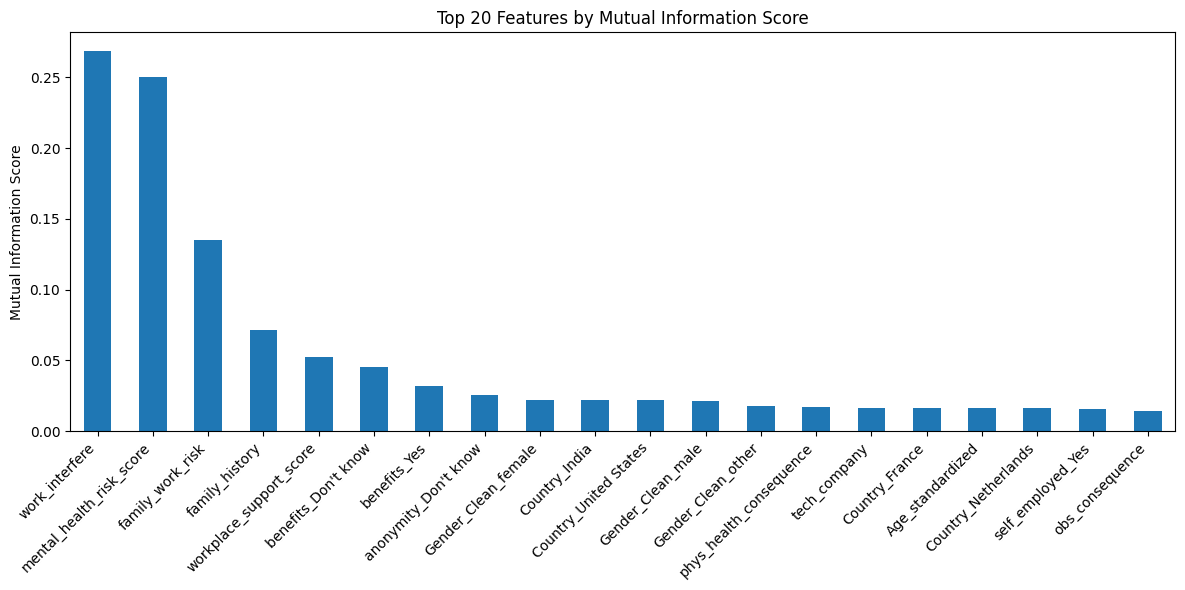

In [344]:
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("Top 20 feature by Mutual Information:")
print(mi_series.head(20))

# Plot MI scores for top features
plt.figure(figsize=(12, 6))
mi_series.head(20).plot.bar()
plt.title("Top 20 Features by Mutual Information Score")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 4. RandomForest Feature importance

Top 15 features by Random Forest Importance:
work_interfere               0.208680
mental_health_risk_score     0.171715
family_work_risk             0.066718
Age_standardized             0.050893
family_history               0.034172
no_employees                 0.029049
stigma_score                 0.028744
workplace_support_score      0.027520
care_options_Yes             0.023235
leave                        0.022336
phys_health_interview        0.018086
coworkers                    0.017929
supervisor                   0.017261
mental_health_consequence    0.015627
Gender_Clean_female          0.011664
dtype: float64


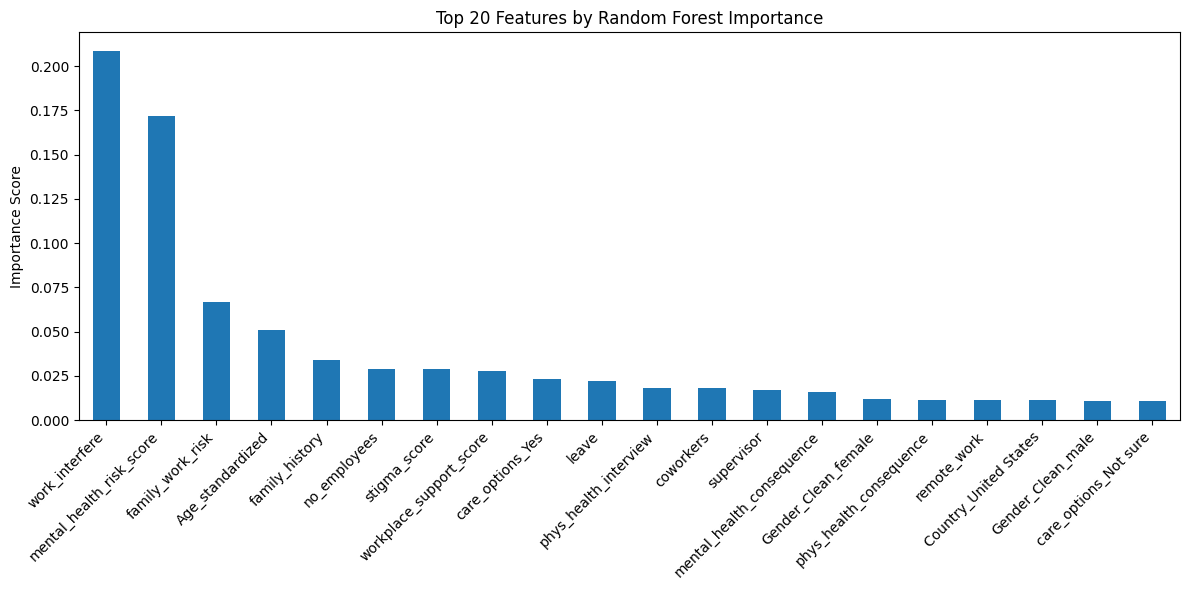

In [345]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

print("Top 15 features by Random Forest Importance:")
print(rf_importances.head(15))

# Plot RF importance for top features
plt.figure(figsize=(12, 6))
rf_importances.head(20).plot(kind='bar')
plt.title('Top 20 Features by Random Forest Importance')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 5. Let us now combine them to get best features from both (using set intersect method)

In [346]:
# Get top features from each method
top_mi_features = set(mi_series.head(20).index)
top_rf_features = set(rf_importances.head(20).index)

In [347]:
# Features that appear in both
combined_features = top_mi_features.intersection(top_rf_features)
print(f"Num of Features selected by BOTH methods: {len(combined_features)}")
print(list(combined_features))

Num of Features selected by BOTH methods: 10
['mental_health_risk_score', 'Country_United States', 'Gender_Clean_male', 'work_interfere', 'family_work_risk', 'Age_standardized', 'Gender_Clean_female', 'phys_health_consequence', 'workplace_support_score', 'family_history']


In [348]:
df_final = df_engineered[list(combined_features) + [target]]

In [349]:
print(f"Final dataset shape: {df_final.shape}")

Final dataset shape: (1254, 11)


# **Final Analysis**

### 1. Analyzing Correlations in Dataset

In [350]:
corr_matrix = df_final.drop(columns=[target]).corr()

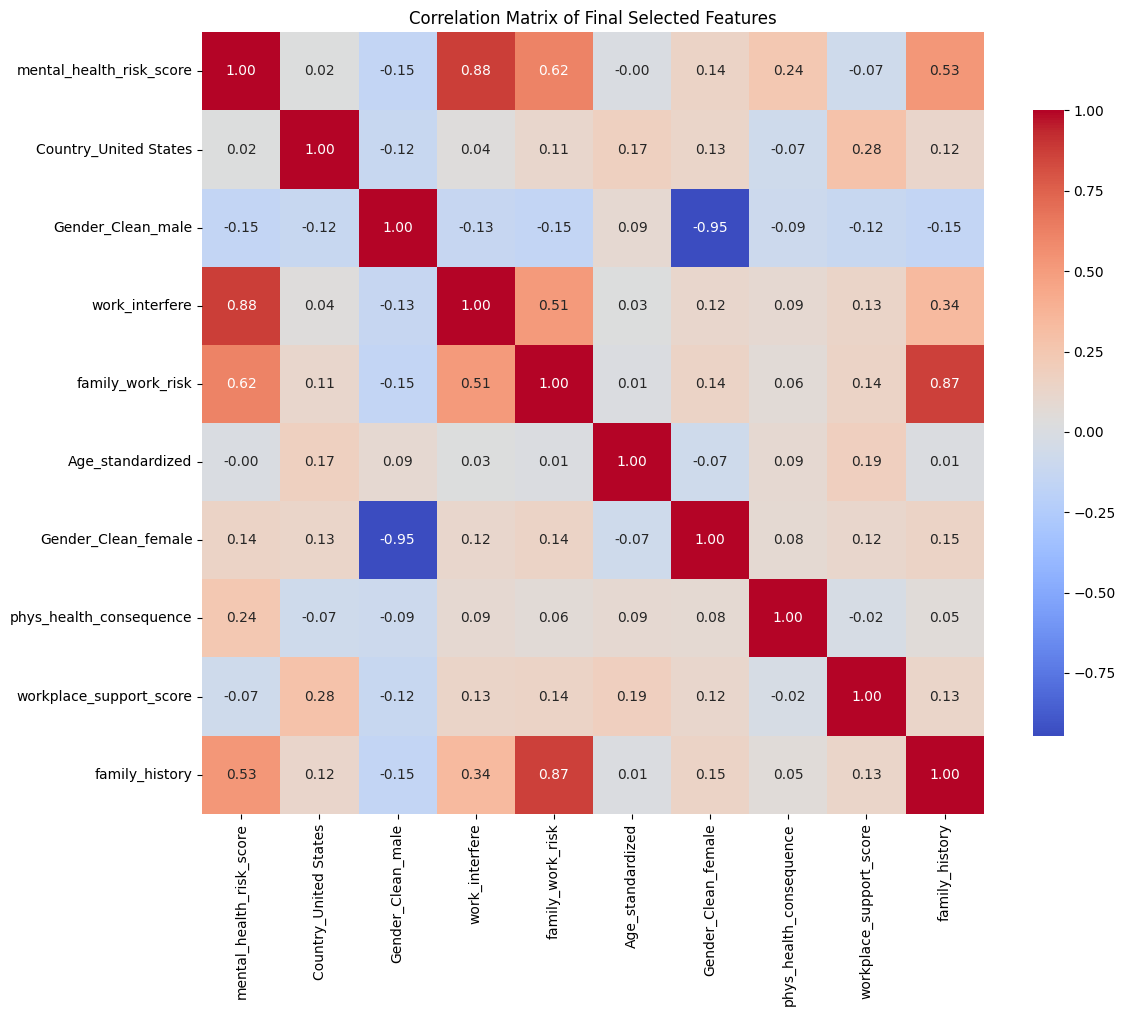

In [351]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Final Selected Features')
plt.tight_layout()
plt.show()

**Highly correlated feature pairs (>0.8):**
- Gender_Clean_female vs Gender_Clean_male: -0.95
- mental_health_risk_score vs work_interfere: 0.88
- family_history vs family_work_risk: 0.87

# **Evaluation**

In [352]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X_final = df_final.drop('treatment', axis=1)
y_final = df_final['treatment']
lr = LogisticRegression(random_state=42, max_iter=1000)
cv_scores = cross_val_score(lr, X_final, y_final, cv=5)
print(f"Cross-validation accuracy: {cv_scores.mean().round(4)}")

Cross-validation accuracy: 0.8253
